### 1. Data Exploration

- **Objective**: Understand the structure of the data, identify missing values, and gather basic statistics.
- **Approach**:
  - Load the training and test datasets.
  - Display the first few rows to understand the features and data format.
  - Check for missing values in both datasets.
  - Gather basic descriptive statistics for numerical features.
  - Inspect data types and non-null counts.
- **Expected Outcome**: A clear understanding of the data's structure, existing missing values, and basic statistical properties.


In [1]:
# Importing necessary libraries
import numpy as np
import pandas as pd
import os

# Load the datasets
train_df = pd.read_csv('train.csv')
test_df = pd.read_csv('test.csv')

# Displaying the first few rows of the training dataset
print("Training Data Head:")
print(train_df.head())

# Displaying the first few rows of the test dataset
print("\nTest Data Head:")
print(test_df.head())

# Checking for missing values in the training dataset
print("\nMissing Values in Training Data:")
print(train_df.isnull().sum())

# Checking for missing values in the test dataset
print("\nMissing Values in Test Data:")
print(test_df.isnull().sum())

# Basic statistics of the training dataset
print("\nTraining Data Description:")
print(train_df.describe())

# Basic statistics of the test dataset
print("\nTest Data Description:")
print(test_df.describe())

# Displaying the data types and non-null counts
print("\nTraining Data Info:")
print(train_df.info())

print("\nTest Data Info:")
print(test_df.info())


Training Data Head:
   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500

### 2. Data Cleaning

- **Objective**: Handle missing values, outliers, and potentially erroneous data.
- **Approach**:
  - Fill missing 'Age' values with the median age, as age is an important factor and median is less sensitive to outliers.
  - Impute missing 'Embarked' values with the mode, considering it's a categorical variable.
  - Fill missing 'Fare' values in the test dataset with the median fare.
  - Drop the 'Cabin' column due to a high percentage of missing data, which might be less informative for the model.
- **Expected Outcome**: A dataset with handled missing values, ready for feature engineering and modeling.


In [2]:
# Data Cleaning

# Filling missing values for 'Age' with the median age
train_df['Age'].fillna(train_df['Age'].median(), inplace=True)
test_df['Age'].fillna(test_df['Age'].median(), inplace=True)

# Filling missing values for 'Embarked' with the mode (most common value)
train_df['Embarked'].fillna(train_df['Embarked'].mode()[0], inplace=True)

# Filling missing values for 'Fare' in the test dataset with the median fare
test_df['Fare'].fillna(test_df['Fare'].median(), inplace=True)

# Dropping the 'Cabin' column due to a large number of missing values
train_df.drop(columns=['Cabin'], inplace=True)
test_df.drop(columns=['Cabin'], inplace=True)

# Confirming the changes
print("Missing Values After Data Cleaning - Training Data:")
print(train_df.isnull().sum())

print("\nMissing Values After Data Cleaning - Test Data:")
print(test_df.isnull().sum())


Missing Values After Data Cleaning - Training Data:
PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

Missing Values After Data Cleaning - Test Data:
PassengerId    0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64


### 3. Feature Engineering

- **Objective**: Enhance the dataset with new features and convert categorical variables into a format suitable for modeling.
- **Approach**:
  - Create a new feature 'FamilySize' combining 'SibSp' and 'Parch'.
  - Extract titles from the 'Name' column as a new feature to capture social status information.
  - Perform one-hot encoding on categorical variables like 'Sex', 'Embarked', and extracted 'Title' to convert them into numerical format.
  - Drop features that are less likely to contribute to the model's predictive power, such as 'Name', 'Ticket', and 'PassengerId'.
- **Expected Outcome**: A dataset enriched with meaningful features, ready for model training.


In [3]:
# Feature Engineering

# Creating new feature 'FamilySize' from 'SibSp' and 'Parch'
train_df['FamilySize'] = train_df['SibSp'] + train_df['Parch'] + 1
test_df['FamilySize'] = test_df['SibSp'] + test_df['Parch'] + 1

# Extracting title from 'Name' as a new feature
train_df['Title'] = train_df['Name'].str.extract(' ([A-Za-z]+)\.', expand=False)
test_df['Title'] = test_df['Name'].str.extract(' ([A-Za-z]+)\.', expand=False)

# One-hot encoding for categorical variables 'Sex', 'Embarked', and 'Title'
train_df_encoded = pd.get_dummies(train_df, columns=['Sex', 'Embarked', 'Title'])
test_df_encoded = pd.get_dummies(test_df, columns=['Sex', 'Embarked', 'Title'])

# Aligning the train and test dataframes to have the same set of columns
common_cols = [col for col in train_df_encoded.columns if col in test_df_encoded.columns and col != 'Survived']
train_df_aligned = train_df_encoded[common_cols + ['Survived']]
test_df_aligned = test_df_encoded[common_cols]

# Dropping columns that are unlikely to be useful for prediction
train_df_aligned.drop(['Name', 'Ticket', 'PassengerId'], axis=1, inplace=True)
test_df_aligned.drop(['Name', 'Ticket', 'PassengerId'], axis=1, inplace=True)


/var/folders/d7/nq2pw38x5yscjmdx_4zjzgn40000gn/T/ipykernel_2875/673078194.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_df_aligned.drop(['Name', 'Ticket', 'PassengerId'], axis=1, inplace=True)
/var/folders/d7/nq2pw38x5yscjmdx_4zjzgn40000gn/T/ipykernel_2875/673078194.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_df_aligned.drop(['Name', 'Ticket', 'PassengerId'], axis=1, inplace=True)


### 4. Exploratory Data Analysis (EDA)

- **Objective**: Explore the data to discover patterns, relationships, and insights.
- **Approach**:
  - Analyze survival rates across different categorical features like 'Pclass', 'Sex', and 'Embarked'.
  - Investigate the distribution of 'Age' and its impact on survival.
  - Examine the correlations between different features using a heatmap.
- **Expected Outcome**: Insights that could influence feature selection, model choice, and understanding of factors affecting survival.


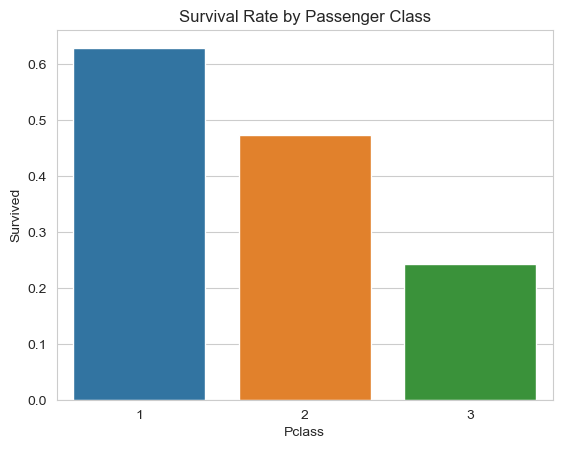

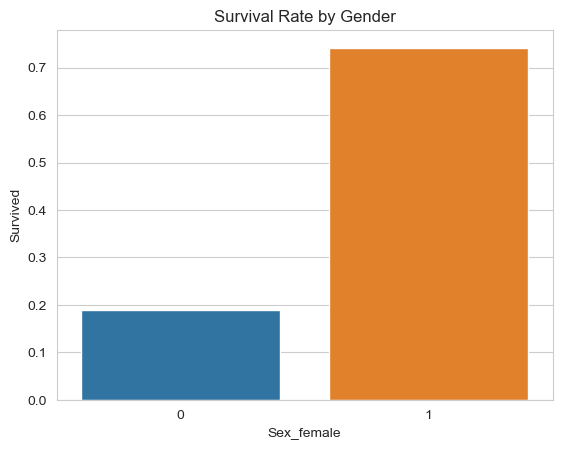

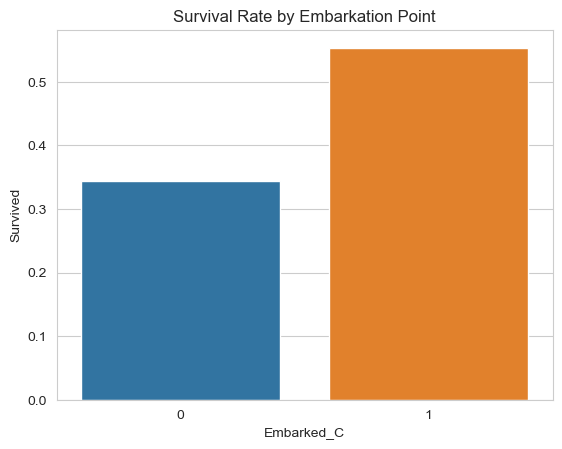

/var/folders/d7/nq2pw38x5yscjmdx_4zjzgn40000gn/T/ipykernel_2875/3609278414.py:30: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(train_df_aligned[train_df_aligned['Survived'] == 0]['Age'], shade=True, color="r", label="Not Survived")
/var/folders/d7/nq2pw38x5yscjmdx_4zjzgn40000gn/T/ipykernel_2875/3609278414.py:31: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(train_df_aligned[train_df_aligned['Survived'] == 1]['Age'], shade=True, color="b", label="Survived")


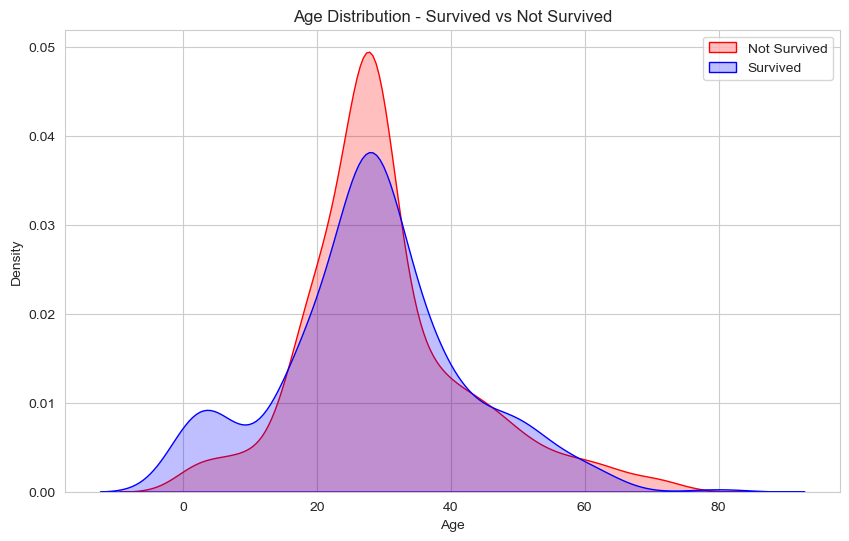

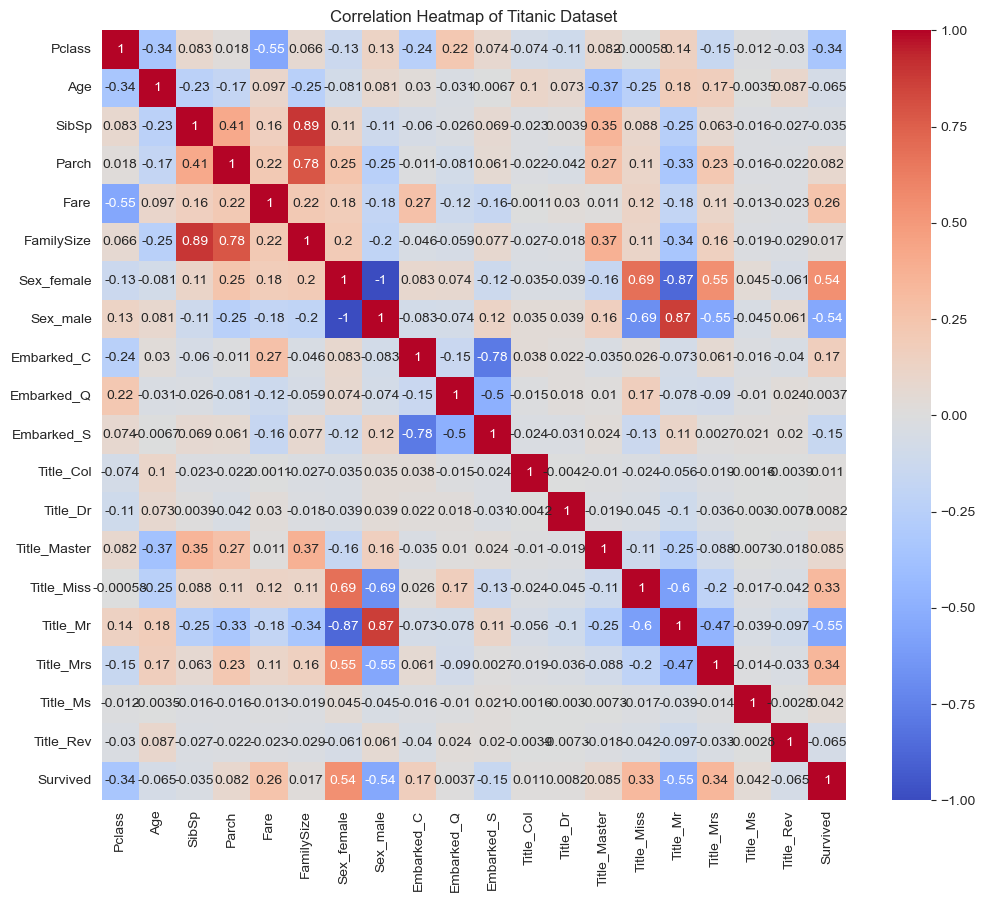

In [4]:
# Importing visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns

# Setting the aesthetic style of the plots
sns.set_style("whitegrid")

# Exploratory Data Analysis

# Analyzing survival rate by different features
def plot_survival_rate(df, column, title):
    survival_rate = df[[column, 'Survived']].groupby([column], as_index=False).mean()
    sns.barplot(x=column, y='Survived', data=survival_rate)
    plt.title(title)
    plt.show()

# Plotting survival rate by Pclass
plot_survival_rate(train_df_aligned, 'Pclass', 'Survival Rate by Passenger Class')

# Check if 'Sex_female' and 'Embarked_C' are in columns
if 'Sex_female' in train_df_aligned.columns and 'Embarked_C' in train_df_aligned.columns:
    # Plotting survival rate by Sex
    plot_survival_rate(train_df_aligned, 'Sex_female', 'Survival Rate by Gender')

    # Plotting survival rate by Embarked location
    plot_survival_rate(train_df_aligned, 'Embarked_C', 'Survival Rate by Embarkation Point')

# Distribution of Age and its impact on Survival
plt.figure(figsize=(10,6))
sns.kdeplot(train_df_aligned[train_df_aligned['Survived'] == 0]['Age'], shade=True, color="r", label="Not Survived")
sns.kdeplot(train_df_aligned[train_df_aligned['Survived'] == 1]['Age'], shade=True, color="b", label="Survived")
plt.title('Age Distribution - Survived vs Not Survived')
plt.legend()
plt.show()

# Correlation heatmap of the dataset
plt.figure(figsize=(12,10))
sns.heatmap(train_df_aligned.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap of Titanic Dataset')
plt.show()


### 5. Model Selection

- **Objective**: Choose appropriate machine learning models for binary classification.
- **Approach**:
  - Include Support Vector Machines (SVM), K-Nearest Neighbors (KNN), RandomForest, GradientBoosting
  - Initialize the models with default or basic parameters for initial testing.
- **Expected Outcome**: A selection of models to be trained and evaluated on the Titanic dataset.


In [5]:
# Importing necessary machine learning models
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier

# Defining a Support Vector Machine (SVM) model
svm_model = SVC()

# Defining a K-Nearest Neighbors (KNN) model
knn_model = KNeighborsClassifier()

# Defining a Random Forest model
random_forest_model = RandomForestClassifier(n_estimators=100)

# Defining a Gradient Boosting model
gradient_boosting_model = GradientBoostingClassifier(n_estimators=100)

# Creating a list of models
models = [svm_model, knn_model, random_forest_model, gradient_boosting_model]

# Printing out each model's name
for model in models:
    print(model.__class__.__name__)


SVC
KNeighborsClassifier
RandomForestClassifier
GradientBoostingClassifier


### 6. Model Training and Hyperparameter Tuning

- **Objective**: Train each selected model and tune their hyperparameters for optimal performance.
- **Approach**:
  - Split the dataset into training and validation sets.
  - Use GridSearchCV for hyperparameter tuning on each model.
  - Train SVM, KNN, Random Forest, and Gradient Boosting models.
  - Evaluate each model's performance based on validation accuracy.
- **Expected Outcome**: Optimally tuned models with their performance metrics, ready for final evaluation and selection.


In [11]:
# Importing necessary libraries
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score

# Preparing the data
X = train_df_aligned.drop('Survived', axis=1)
y = train_df_aligned['Survived']
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.4, random_state=50)

# Initializing models
svm_model = SVC()
knn_model = KNeighborsClassifier()
random_forest_model = RandomForestClassifier(n_estimators=200)
gradient_boosting_model = GradientBoostingClassifier(n_estimators=200)
models = [svm_model, knn_model, random_forest_model, gradient_boosting_model]

# Function for training and tuning
def train_and_evaluate_model(model, params, X_train, y_train, X_val, y_val):
    grid_search = GridSearchCV(model, params, cv=5, scoring='accuracy')
    grid_search.fit(X_train, y_train)
    best_model = grid_search.best_estimator_
    predictions = best_model.predict(X_val)
    accuracy = accuracy_score(y_val, predictions)
    print(f"Model: {model.__class__.__name__}")
    print(f"Best Parameters: {grid_search.best_params_}")
    print(f"Validation Accuracy: {accuracy}")
    return best_model

# Training and tuning each model
trained_models = []
for model in models:
    params = {}
    if model == svm_model:
        params = {'C': [0.1, 1, 10], 'kernel': ['linear', 'rbf']}
    elif model == knn_model:
        params = {'n_neighbors': [3, 5, 7, 9]}
    elif model == random_forest_model:
        params = {'n_estimators': [250, 500, 1000], 'max_depth': [5, 10, 20]}
    elif model == gradient_boosting_model:
        params = {'n_estimators': [50, 100, 150], 'learning_rate': [0.1, 0.2, 0.3]}

    trained_model = train_and_evaluate_model(model, params, X_train, y_train, X_val, y_val)
    trained_models.append(trained_model)


Model: SVC
Best Parameters: {'C': 1, 'kernel': 'linear'}
Validation Accuracy: 0.8375350140056023
Model: KNeighborsClassifier
Best Parameters: {'n_neighbors': 3}
Validation Accuracy: 0.7198879551820728
Model: RandomForestClassifier
Best Parameters: {'max_depth': 5, 'n_estimators': 500}
Validation Accuracy: 0.8291316526610645
Model: GradientBoostingClassifier
Best Parameters: {'learning_rate': 0.1, 'n_estimators': 150}
Validation Accuracy: 0.8179271708683473


### 7. Model Evaluation

- **Objective**: Assess the performance of each trained model using validation data.
- **Approach**:
  - Utilize classification metrics such as accuracy, precision, recall, and F1-score for evaluation.
  - Generate and examine confusion matrices for each model to understand their true positives, false positives, true negatives, and false negatives.
- **Expected Outcome**: Detailed performance metrics for each model, providing insights into their strengths and weaknesses in predicting Titanic survivors.


In [12]:
# Importing libraries for evaluation
from sklearn.metrics import classification_report, confusion_matrix

# Function to evaluate a model
def evaluate_model(model, X_val, y_val):
    predictions = model.predict(X_val)
    print(f"Evaluation for {model.__class__.__name__}:")
    print(classification_report(y_val, predictions))
    print("Confusion Matrix:")
    print(confusion_matrix(y_val, predictions))
    print("\n")

# Evaluating each trained model
for model in trained_models:
    evaluate_model(model, X_val, y_val)


Evaluation for SVC:
              precision    recall  f1-score   support

           0       0.84      0.90      0.87       218
           1       0.83      0.73      0.78       139

    accuracy                           0.84       357
   macro avg       0.84      0.82      0.83       357
weighted avg       0.84      0.84      0.84       357

Confusion Matrix:
[[197  21]
 [ 37 102]]


Evaluation for KNeighborsClassifier:
              precision    recall  f1-score   support

           0       0.74      0.84      0.79       218
           1       0.68      0.53      0.60       139

    accuracy                           0.72       357
   macro avg       0.71      0.69      0.69       357
weighted avg       0.71      0.72      0.71       357

Confusion Matrix:
[[183  35]
 [ 65  74]]


Evaluation for RandomForestClassifier:
              precision    recall  f1-score   support

           0       0.82      0.92      0.87       218
           1       0.84      0.69      0.76       139



### 8. Predictions on Test Data

- **Objective**: Use the best-performing model to make predictions on the test dataset.
- **Approach**:
  - Select the best-performing model from the previous evaluation step.
  - Use this model to predict the survival of passengers in the test dataset.
  - Prepare a submission file in the format required by the competition (PassengerId, Survived).
- **Expected Outcome**: A CSV file ready for submission to the Kaggle competition, containing predictions of survival for each passenger in the test dataset.


In [13]:
# Assuming 'best_model' is the chosen model from the trained models
best_model = trained_models[2]  

# Making predictions on the test data
test_predictions = best_model.predict(test_df_aligned)

# Preparing the submission dataframe
submission = pd.DataFrame({
    "PassengerId": test_df['PassengerId'],  # Assuming original test data has 'PassengerId'
    "Survived": test_predictions
})

# Saving the submission file
submission.to_csv('titanic_predictions.csv', index=False)

# Displaying the first few rows of the submission file
print(submission.head())


   PassengerId  Survived
0          892         0
1          893         0
2          894         0
3          895         0
4          896         0
